# Customer Segmentation


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
customers_data = pd.read_csv("../input/segmentation-data/segmentation data.csv")

In [3]:
# Preview Dataset
customers_data.head()

,ID,Gender,Marital_Status,Age,Education,Income,Occupation,Settlement_Size
0,100000001,Male,Single,67,Graduate,124670,Skilled,Big City
1,100000002,Female,Not-Single,22,High School,150773,Skilled,Big City
2,100000003,Male,Single,49,High School,89210,unemployed/unskilled,Small City
3,100000004,Male,Single,45,High School,171565,Skilled,mid-Sized City
4,100000005,Male,Single,53,High School,149031,Skilled,mid-Sized City


In [4]:
# Summary of the dataset
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Marital_Status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement_Size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [5]:
# For any null values
customers_data.isnull().sum()

ID                 0
Gender             0
Marital_Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement_Size    0
dtype: int64

In [6]:
# droping the data column, which doesn't required
customers_data.drop(["ID"],axis=1,inplace=True)

In [7]:
# making copy of the dataset
customers_data_copy= customers_data.copy()

In [8]:
# converting string data to numerical, as clustering algorithm used distance based measurement

customers_data["Gender"]=customers_data["Gender"].replace(('Male','Female'),(0,1))
customers_data["Marital_Status"]=customers_data["Marital_Status"].replace(('Single','Not-Single'),(0,1))
customers_data["Education"]=customers_data["Education"].replace(('Unknown/Other','High School','Graduate','Post-Graduate'),(0,1,2,3))
customers_data["Occupation"]=customers_data["Occupation"].replace(('unemployed/unskilled','Skilled','Management/officer/self-employed'),(0,1,2))
customers_data["Settlement_Size"]=customers_data["Settlement_Size"].replace(('Small City','mid-Sized City','Big City'),(0,1,2))

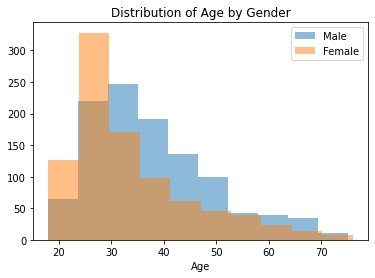

In [9]:
plt.hist('Age', data=customers_data[customers_data['Gender'] == 0], alpha=0.5, label='Male');
plt.hist('Age', data=customers_data[customers_data['Gender'] == 1], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

# here, young males are greater than females

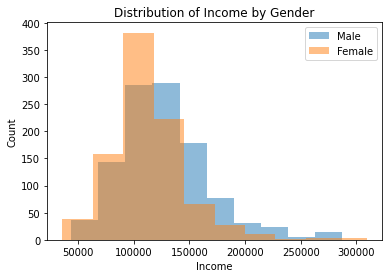

In [10]:
plt.hist('Income', data=customers_data[customers_data['Gender'] == 0], alpha=0.5, label='Male');
plt.hist('Income', data=customers_data[customers_data['Gender'] == 1], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income');
plt.ylabel('Count')
plt.legend()

# here, males have huge earnings than females

<AxesSubplot:>

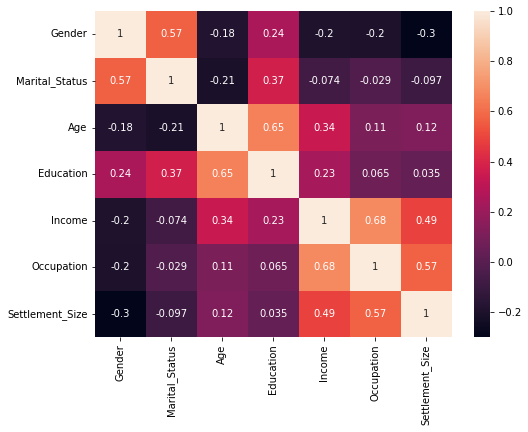

In [11]:
# heatmap is used to find out the correlation between features
#more positive the correlation is better the features used to cluster the dataset
plt.figure(figsize=(8,6))
sns.heatmap(customers_data.corr(),annot=True)

In [12]:
#importing modules for feature scaling
from sklearn.preprocessing import StandardScaler

In [13]:
# Scaling Data
scalar = StandardScaler()
scaled_data = scalar.fit_transform(customers_data)
# fit_transform compute the mean and std ,and then transform it
scaled_data

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# K-means
    It is an iterative algortim to partition dataset into subgroups

In [14]:
# importing modules for K means
from sklearn.cluster import KMeans

Text(0, 0.5, 'Sum_of_Squared_distance')

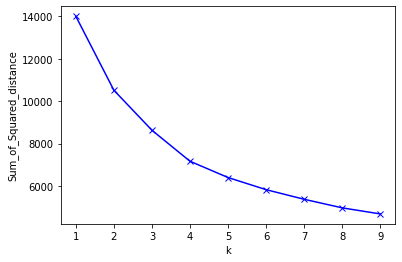

In [15]:
# Applying Elbow method to Find optimum number of clusters
Sum_of_Squared_distance = []
for k in range (1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans = kmeans.fit(scaled_data)# compute k-means
    Sum_of_Squared_distance.append(kmeans.inertia_)
# inertia, calculates the sum of squared distances of samples to their closest cluster center

plt.plot(range(1,10), Sum_of_Squared_distance , 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Squared_distance')

## Clustering on the basis of AGE and INCOME

In [16]:
# Applying Kmeans to make data cluster
# Taking number of CLusters = 4,
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=48 , max_iter=600)
y_kmeans = kmeans.fit_predict(scaled_data[:,[2,4]])
y_kmeans

array([3, 1, 3, ..., 2, 2, 2], dtype=int32)

In [17]:
# making new column clusters
customers_data['Clusters']=y_kmeans

## Visualisation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cluster of Customers')

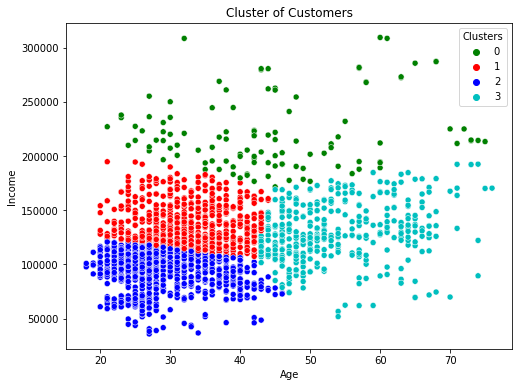

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(customers_data['Age'],customers_data['Income'],hue='Clusters', data=customers_data , palette=['g','r','b','c'])
plt.title('Cluster of Customers')

In [19]:
customers_data['Clusters'].value_counts()

2    866
1    622
3    398
0    114
Name: Clusters, dtype: int64

## Observation of Clustering based on Age And Income
    cluster 0- Very few Rich people
    cluster 1- Most of the population is young with good income
    cluster 2- 30% of population is young with high income
    cluster 3- Grey people with good income 

## Clustering with full dataset

In [20]:
cus=customers_data.copy()

In [21]:
# Applying Kmeans to make data cluster
# Taking number of CLusters = 4,
model_full = KMeans(n_clusters=4, init='k-means++', random_state=42)
model_full_means =model_full.fit_predict(scaled_data)
model_full_means

array([0, 3, 1, ..., 1, 3, 1], dtype=int32)

In [22]:
cus['Clusters']=model_full_means

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Income'>

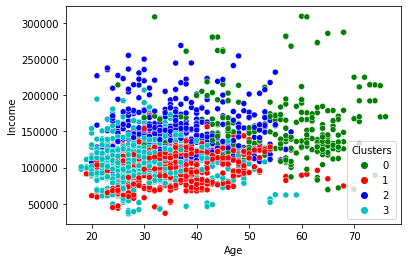

In [23]:
sns.scatterplot(cus['Age'],cus['Income'],hue='Clusters',data=cus,palette=['g','r','b','c'])

In [24]:
cus['Clusters'].value_counts()

3    705
2    570
1    462
0    263
Name: Clusters, dtype: int64

In [25]:
customers_data_copy[cus['Clusters'] == 0].describe(percentiles=[],include='all')

,Gender,Marital_Status,Age,Education,Income,Occupation,Settlement_Size
count,263,263,263.000000,263,263.000000,263,263
unique,2,2,NaN,3,NaN,3,3
top,Female,Not-Single,NaN,Graduate,NaN,Skilled,mid-Sized City
freq,132,182,NaN,225,NaN,147,104
mean,NaN,NaN,55.703422,NaN,158338.422053,NaN,NaN
std,NaN,NaN,10.502066,NaN,46204.670732,NaN,NaN
min,NaN,NaN,25.000000,NaN,69487.000000,NaN,NaN
50%,NaN,NaN,57.000000,NaN,146716.000000,NaN,NaN
max,NaN,NaN,76.000000,NaN,309364.000000,NaN,NaN


## Cluster 0-
    These people are doing well
    69% are married
    most possess graduate level of education
    most of them are Skilled and hold officier or management ranks
    mostly settled in mid-Sized and big citites

In [26]:
customers_data_copy[cus['Clusters'] == 1].describe(percentiles=[],include='all')

,Gender,Marital_Status,Age,Education,Income,Occupation,Settlement_Size
count,462,462,462.000000,462,462.000000,462,462
unique,2,2,NaN,3,NaN,2,2
top,Male,Single,NaN,High School,NaN,unemployed/unskilled,Small City
freq,299,453,NaN,309,NaN,310,442
mean,NaN,NaN,35.577922,NaN,97859.852814,NaN,NaN
std,NaN,NaN,8.749180,NaN,22950.837099,NaN,NaN
min,NaN,NaN,19.000000,NaN,36760.000000,NaN,NaN
50%,NaN,NaN,35.000000,NaN,99102.000000,NaN,NaN
max,NaN,NaN,68.000000,NaN,171857.000000,NaN,NaN


## Cluster 1-
    People with fewer opportunities
    Almost everyone is single
    They are people with lower edcuation
    67% of them are unemployed/unskilled,
    more than 95% setlled in small cities

In [27]:
customers_data_copy[cus['Clusters'] == 2].describe(percentiles=[],include='all')

,Gender,Marital_Status,Age,Education,Income,Occupation,Settlement_Size
count,570,570,570.000000,570,570.000000,570,570
unique,2,2,NaN,2,NaN,3,3
top,Male,Single,NaN,High School,NaN,Skilled,Big City
freq,553,471,NaN,418,NaN,393,309
mean,NaN,NaN,35.635088,NaN,141218.249123,NaN,NaN
std,NaN,NaN,8.501018,NaN,33459.299686,NaN,NaN
min,NaN,NaN,20.000000,NaN,82398.000000,NaN,NaN
50%,NaN,NaN,35.000000,NaN,135629.000000,NaN,NaN
max,NaN,NaN,58.000000,NaN,268906.000000,NaN,NaN


## Cluster 2-
    These people have some Standard
    Almost exeryone is married/divorced/widowed
    Most have Highschool level Education
    They are skilled and non skilled with fewer management level ranks
    mostly settled in small and mid_sized cities

In [28]:
customers_data_copy[cus['Clusters'] == 3].describe(percentiles=[],include='all')

,Gender,Marital_Status,Age,Education,Income,Occupation,Settlement_Size
count,705,705,705.000000,705,705.000000,705,705
unique,2,2,NaN,2,NaN,3,3
top,Female,Not-Single,NaN,High School,NaN,Skilled,Small City
freq,602,703,NaN,657,NaN,421,471
mean,NaN,NaN,28.963121,NaN,105759.119149,NaN,NaN
std,NaN,NaN,6.751582,NaN,25370.288131,NaN,NaN
min,NaN,NaN,18.000000,NaN,35832.000000,NaN,NaN
50%,NaN,NaN,27.000000,NaN,106577.000000,NaN,NaN
max,NaN,NaN,59.000000,NaN,207262.000000,NaN,NaN


## Cluster 3-
    They are career focused 
    82% of them are single
    They are young people with high school and other education levels
    They are skilled worker, holds management and officier level ranks
    Most of them are setlled in big and mid_sized citites

# Graph representation of clustering

In [29]:
import plotly.express as px

px.line_polar

clusters=pd.DataFrame(scaled_data,columns=['Gender', 'Marital_Status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement_Size'])
clusters['Clusters']=model_full.labels_
polar=clusters.groupby("Clusters").mean().reset_index()# this is used to make Cluster columns as index
polar=pd.melt(polar,id_vars=["Clusters"])#this is used to categorised dataframe into the features with there mean value for each cluster
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True,height=500,width=500)
fig.show()